# Problem Set 2

## Question 4

In [ ]:
I did this question by the help of Alessia!!

Do Exercise 26.12 in Hansen (2022).

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
datos=pd.read_stata('https://www.ssc.wisc.edu/~bhansen/econometrics/cps09mar.dta')
print(datos.head())

    age  female  hisp  education  earnings  hours  week  union  uncov  region  \
0  52.0     0.0   0.0       12.0  146000.0   45.0  52.0    0.0    0.0     1.0   
1  38.0     0.0   0.0       18.0   50000.0   45.0  52.0    0.0    0.0     1.0   
2  38.0     0.0   0.0       14.0   32000.0   40.0  51.0    0.0    0.0     1.0   
3  41.0     1.0   0.0       13.0   47000.0   40.0  52.0    0.0    0.0     1.0   
4  42.0     0.0   0.0       13.0  161525.0   50.0  52.0    1.0    0.0     1.0   

   race  marital  
0   1.0      1.0  
1   1.0      1.0  
2   1.0      1.0  
3   1.0      1.0  
4   1.0      1.0  


In [2]:
men_data=datos[datos.female==0]
men_data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52.0,0.0,0.0,12.0,146000.0,45.0,52.0,0.0,0.0,1.0,1.0,1.0
1,38.0,0.0,0.0,18.0,50000.0,45.0,52.0,0.0,0.0,1.0,1.0,1.0
2,38.0,0.0,0.0,14.0,32000.0,40.0,51.0,0.0,0.0,1.0,1.0,1.0
4,42.0,0.0,0.0,13.0,161525.0,50.0,52.0,1.0,0.0,1.0,1.0,1.0
6,51.0,0.0,0.0,16.0,37000.0,44.0,52.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50727,52.0,0.0,0.0,16.0,20000.0,55.0,52.0,0.0,0.0,4.0,4.0,1.0
50729,49.0,0.0,0.0,13.0,45000.0,40.0,52.0,0.0,0.0,4.0,1.0,1.0
50732,56.0,0.0,0.0,16.0,84000.0,50.0,52.0,0.0,0.0,4.0,4.0,7.0
50739,58.0,0.0,0.0,12.0,75000.0,50.0,52.0,0.0,0.0,4.0,1.0,1.0


In [3]:
#we create a copy of marital column to merge the first four categories of marital status into one category.
men_data['marital_cat']=men_data['marital'].copy()
men_data.loc[men_data['marital_cat']<5,'marital_cat']=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [4]:
men_data


,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,marital_cat
0,52.0,0.0,0.0,12.0,146000.0,45.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
1,38.0,0.0,0.0,18.0,50000.0,45.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
2,38.0,0.0,0.0,14.0,32000.0,40.0,51.0,0.0,0.0,1.0,1.0,1.0,1.0
4,42.0,0.0,0.0,13.0,161525.0,50.0,52.0,1.0,0.0,1.0,1.0,1.0,1.0
6,51.0,0.0,0.0,16.0,37000.0,44.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50727,52.0,0.0,0.0,16.0,20000.0,55.0,52.0,0.0,0.0,4.0,4.0,1.0,1.0
50729,49.0,0.0,0.0,13.0,45000.0,40.0,52.0,0.0,0.0,4.0,1.0,1.0,1.0
50732,56.0,0.0,0.0,16.0,84000.0,50.0,52.0,0.0,0.0,4.0,4.0,7.0,7.0
50739,58.0,0.0,0.0,12.0,75000.0,50.0,52.0,0.0,0.0,4.0,1.0,1.0,1.0


In [5]:
#We want age as an explanatory variable and marital status as dependent variable
X= men_data['age']

Y = men_data['marital_cat']

In [6]:
logit_model_men=sm.MNLogit(Y,sm.add_constant(X))
result_men=logit_model_men.fit(method='newton',full_output=1)
print(result_men.summary())

Optimization terminated successfully.
         Current function value: 0.711288
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:            marital_cat   No. Observations:                29140
Model:                        MNLogit   Df Residuals:                    29134
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Oct 2022   Pseudo R-squ.:                  0.1186
Time:                        18:00:24   Log-Likelihood:                -20727.
converged:                       True   LL-Null:                       -23515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
marital_cat=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.1264      0.096    -32.471      0.000      -3.315      -2.938
age               0.

Text(0.5, 1.0, 'Probability of Marital Status Given Age for Men')

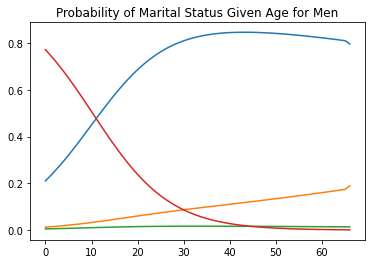

In [8]:
# Plot the graphs 
age_unique = np.sort(datos.age.unique()).reshape(-1,1)

## MEN
men_probability_dist = logit_model_men.predict(result_men.params, exog= sm.tools.add_constant(age_unique), linear= False)

plt.plot(men_probability_dist)
plt.title("Probability of Marital Status Given Age for Men")

In [10]:
#subset of women
women_data=datos[datos.female==1]
women_data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
3,41.0,1.0,0.0,13.0,47000.0,40.0,52.0,0.0,0.0,1.0,1.0,1.0
5,66.0,1.0,0.0,13.0,33000.0,40.0,52.0,0.0,0.0,1.0,1.0,5.0
7,49.0,1.0,0.0,16.0,37000.0,44.0,52.0,0.0,0.0,1.0,1.0,1.0
9,52.0,1.0,0.0,14.0,32000.0,40.0,52.0,0.0,0.0,1.0,1.0,1.0
15,35.0,1.0,0.0,14.0,48000.0,36.0,52.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50735,53.0,1.0,0.0,13.0,38000.0,40.0,52.0,0.0,0.0,4.0,4.0,5.0
50736,25.0,1.0,0.0,11.0,20000.0,37.0,52.0,0.0,0.0,4.0,4.0,7.0
50737,58.0,1.0,0.0,11.0,30000.0,40.0,52.0,0.0,0.0,4.0,4.0,6.0
50738,62.0,1.0,0.0,16.0,35000.0,40.0,52.0,0.0,0.0,4.0,4.0,6.0


In [11]:
women_data['marital_cat']=women_data['marital'].copy()
women_data.loc[women_data['marital_cat']<5,'marital_cat']=1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:

X= women_data['age']

Y = women_data['marital_cat']

In [14]:
women_data


,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,marital_cat
3,41.0,1.0,0.0,13.0,47000.0,40.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
5,66.0,1.0,0.0,13.0,33000.0,40.0,52.0,0.0,0.0,1.0,1.0,5.0,5.0
7,49.0,1.0,0.0,16.0,37000.0,44.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
9,52.0,1.0,0.0,14.0,32000.0,40.0,52.0,0.0,0.0,1.0,1.0,1.0,1.0
15,35.0,1.0,0.0,14.0,48000.0,36.0,52.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50735,53.0,1.0,0.0,13.0,38000.0,40.0,52.0,0.0,0.0,4.0,4.0,5.0,5.0
50736,25.0,1.0,0.0,11.0,20000.0,37.0,52.0,0.0,0.0,4.0,4.0,7.0,7.0
50737,58.0,1.0,0.0,11.0,30000.0,40.0,52.0,0.0,0.0,4.0,4.0,6.0,6.0
50738,62.0,1.0,0.0,16.0,35000.0,40.0,52.0,0.0,0.0,4.0,4.0,6.0,6.0


In [15]:
logit_model_women=sm.MNLogit(Y,sm.add_constant(X))
result_women=logit_model_women.fit(method='newton',full_output=1)
print(result_women.summary())

Optimization terminated successfully.
         Current function value: 0.930872
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:            marital_cat   No. Observations:                21602
Model:                        MNLogit   Df Residuals:                    21596
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Oct 2022   Pseudo R-squ.:                 0.07776
Time:                        18:04:21   Log-Likelihood:                -20109.
converged:                       True   LL-Null:                       -21804.
Covariance Type:            nonrobust   LLR p-value:                     0.000
marital_cat=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.6759      0.088    -30.363      0.000      -2.849      -2.503
age               0.

Text(0.5, 1.0, 'Probability of Marital Status Given Age for Women')

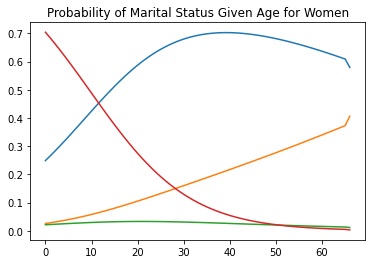

In [16]:
# Plot the graphs 
age_unique = np.sort(datos.age.unique()).reshape(-1,1)

## MEN
women_probability_dist = logit_model_women.predict(result_women.params, exog= sm.tools.add_constant(age_unique), linear= False)

plt.plot(women_probability_dist)
plt.title("Probability of Marital Status Given Age for Women")